In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv(r"C:\Tejas\DATA jason\Data Set + Learning\May ( python )\unguided project data scince job\AustraliaDataScienceJobs.csv")

In [3]:
df.head()

,Job Title,Job Location,Company,Url,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,95917,80000,115000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,115631,94000,143000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(2088, 53)

In [5]:
null_values_series = ((df.isnull().sum() / df.shape[0]) * 100).round(2) 
null_values_series

Job Title                         0.14
Job Location                      0.00
Company                           0.00
Url                               0.00
Estimate Base Salary              0.00
Low Estimate                      0.00
High Estimate                     0.00
Company Size                      8.67
Company Type                      8.67
Company Sector                   27.16
Company Founded                  42.62
Company Industry                 27.16
Company Revenue                   8.67
Job Descriptions                  0.00
Company Rating                   14.89
Company Friend Reccomendation    17.05
Company CEO Approval             36.59
Companny Number of Rater         14.89
Company Career Opportinities     15.23
Compensation and Benefits        15.23
Company Culture and Values       15.23
Company Senior Management        15.23
Company Work Life Balance        15.23
Country                           0.00
State                             0.00
python_yn                

In [6]:
df.dtypes

Job Title                         object
Job Location                      object
Company                           object
Url                               object
Estimate Base Salary               int64
Low Estimate                       int64
High Estimate                      int64
Company Size                      object
Company Type                      object
Company Sector                    object
Company Founded                  float64
Company Industry                  object
Company Revenue                   object
Job Descriptions                  object
Company Rating                   float64
Company Friend Reccomendation    float64
Company CEO Approval             float64
Companny Number of Rater         float64
Company Career Opportinities     float64
Compensation and Benefits        float64
Company Culture and Values       float64
Company Senior Management        float64
Company Work Life Balance        float64
Country                           object
State           

In [7]:
null_values_series.to_frame(name='null_values').join(df.dtypes.to_frame(name='types'))

,null_values,types
Job Title,0.14,object
Job Location,0.00,object
Company,0.00,object
Url,0.00,object
Estimate Base Salary,0.00,int64
Low Estimate,0.00,int64
High Estimate,0.00,int64
Company Size,8.67,object
Company Type,8.67,object
Company Sector,27.16,object


In [8]:
# Bring only the object columns (strings)
objects = 'object'
object_column_names = df.select_dtypes(include=objects).columns
print(object_column_names, '\n')

Index(['Job Title', 'Job Location', 'Company', 'Url', 'Company Size',
       'Company Type', 'Company Sector', 'Company Industry', 'Company Revenue',
       'Job Descriptions', 'Country', 'State'],
      dtype='object') 



In [9]:
object_column_names = object_column_names.drop(['Url', 'Job Descriptions'], errors='ignore')
[print(f'{df[column].value_counts()}\n{"-"*50}') for column in object_column_names]

Job Title
Data Scientist                   431
Data Analyst                     188
Data Engineer                     95
Machine Learning Engineer         71
Data Specialist                   58
                                ... 
Lead BI Manager                    1
Analyst Manager                    1
Environmental Specialist           1
Technical Support                  1
Information Security Engineer      1
Name: count, Length: 246, dtype: int64
--------------------------------------------------
Job Location
Melbourne         600
Sydney            522
Brisbane          168
Perth             137
Adelaide          110
                 ... 
Broadbeach          1
Bowen Hills         1
Burleigh Heads      1
Townsville          1
Bunbury             1
Name: count, Length: 87, dtype: int64
--------------------------------------------------
Company
Deloitte                                    139
CSIRO                                        79
Give A Grad A Go                             

[None, None, None, None, None, None, None, None, None, None]

In [10]:
# Function to create charts for categorical columns
def object_chart(df, column):
    df_grouped = df[column].value_counts().to_frame(name='Count').reset_index().rename(columns={'index': column})
    ax = sns.barplot(data=df_grouped.head(10), y =column, x='Count')
    plt.show()

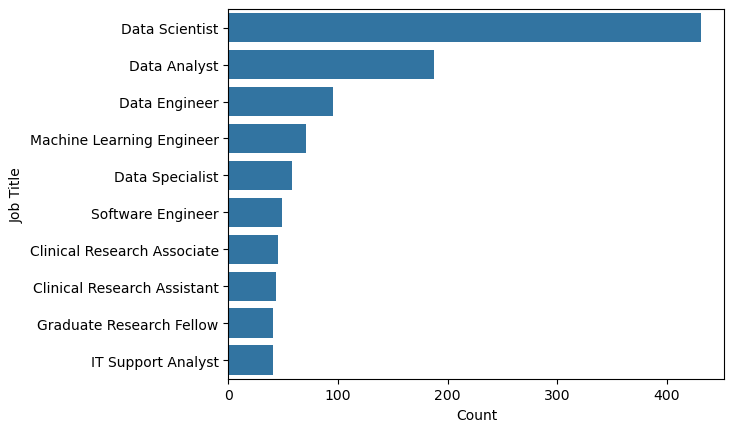

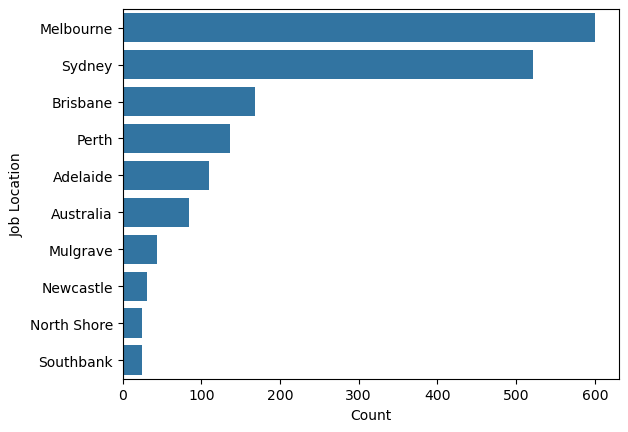

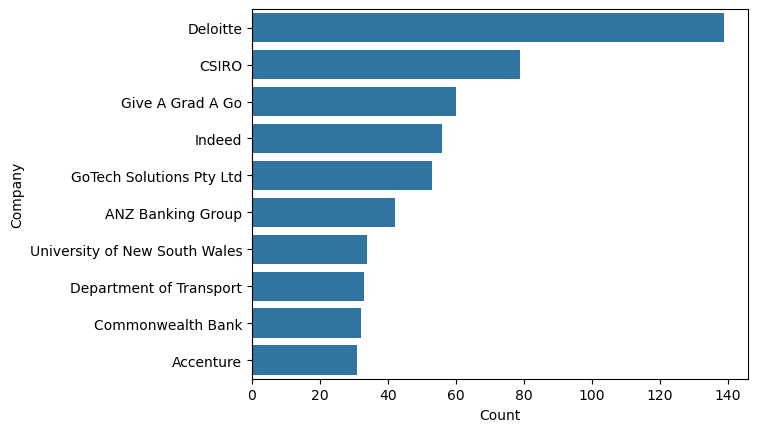

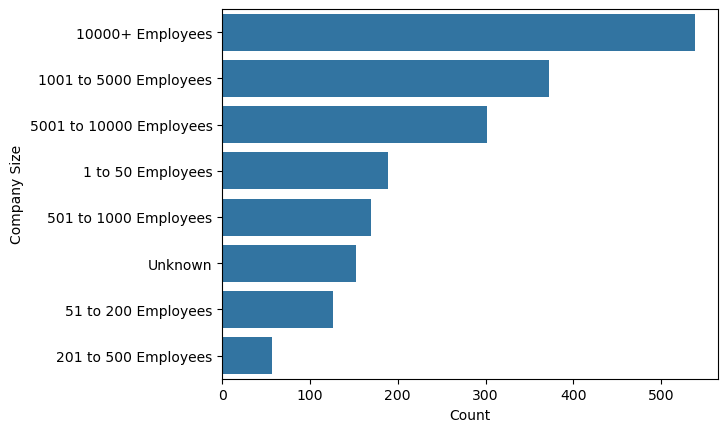

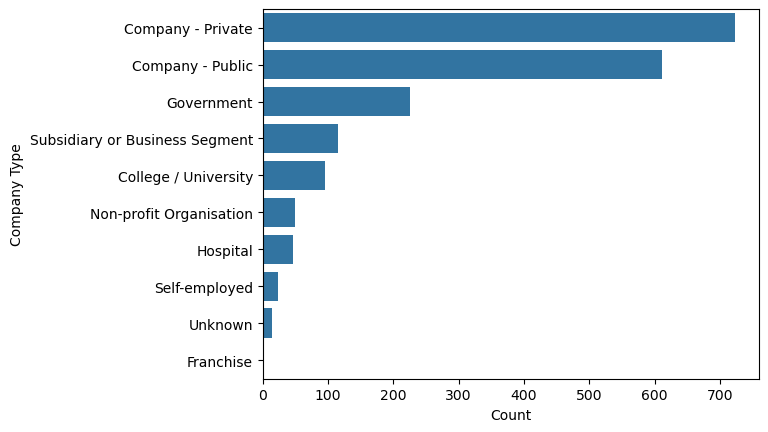

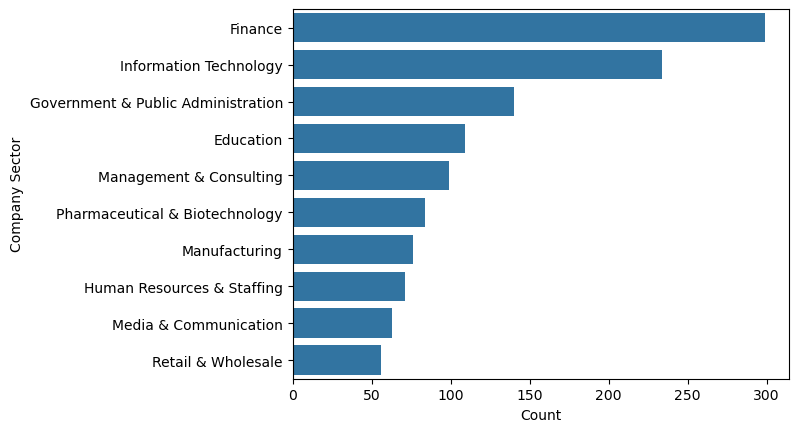

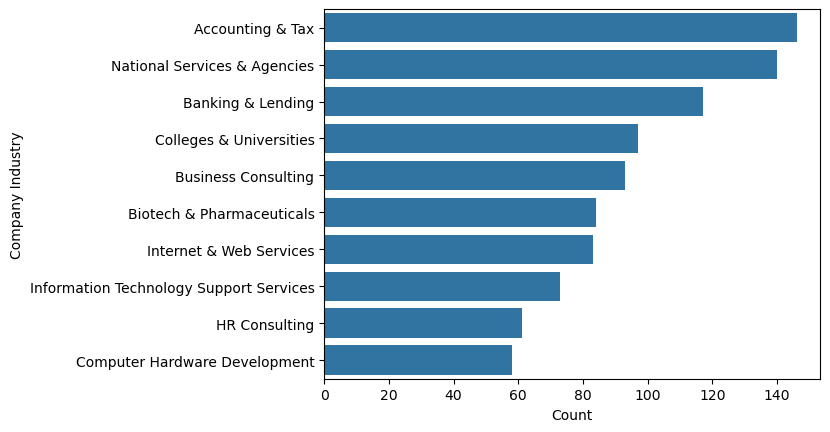

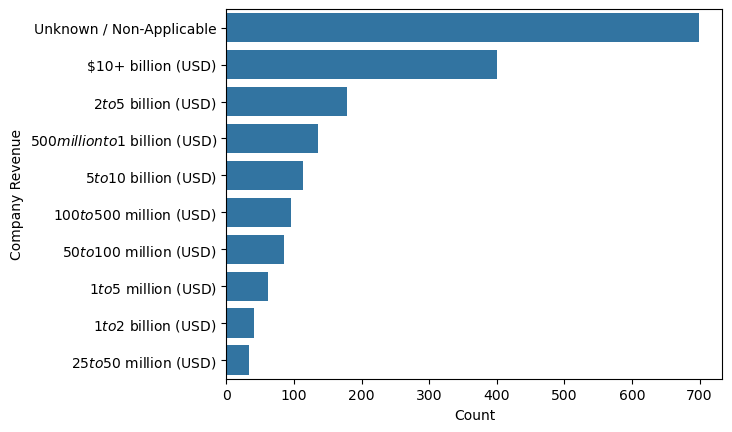

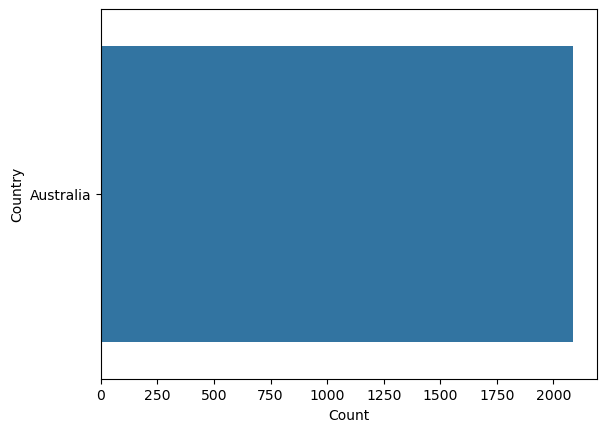

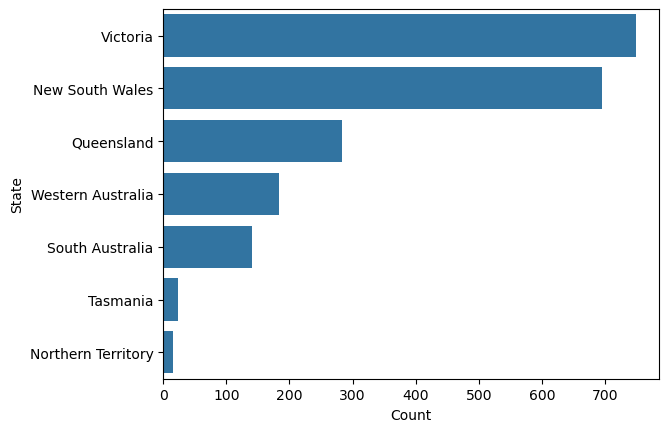

[None, None, None, None, None, None, None, None, None, None]

In [11]:
[object_chart(df, column) for column in object_column_names]

In [12]:
# Bring only the nuemric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_column_names = df.select_dtypes(include=numerics).columns
print(numeric_column_names, '\n')

Index(['Estimate Base Salary', 'Low Estimate', 'High Estimate',
       'Company Founded', 'Company Rating', 'Company Friend Reccomendation',
       'Company CEO Approval', 'Companny Number of Rater',
       'Company Career Opportinities', 'Compensation and Benefits',
       'Company Culture and Values', 'Company Senior Management',
       'Company Work Life Balance', 'python_yn', 'r_yn', 'sql_yn', 'java_yn',
       'julia_yn', 'scala_yn', 'c_yn', 'c++_yn', 'javascript_yn', 'spark_yn',
       'hadoop_yn', 'matlab_yn', 'sas_yn', 'git_yn', 'excel_yn', 'nosql_yn',
       'aws_yn', 'mongodb_yn', 'cassandra_yn', 'hive_yn', 'bigml_yn',
       'tableau_yn', 'powerbi_yn', 'nlp_yn', 'pytorch_yn', 'tensorflow_yn',
       'mathematic_yn', 'statistic_yn'],
      dtype='object') 



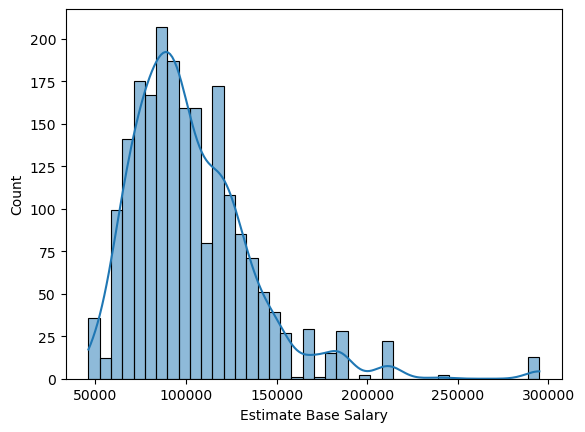

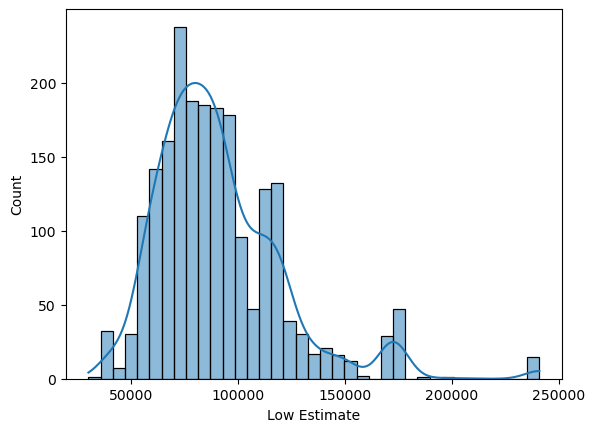

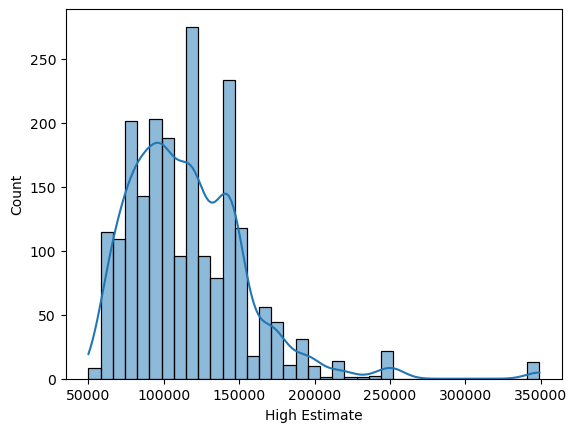

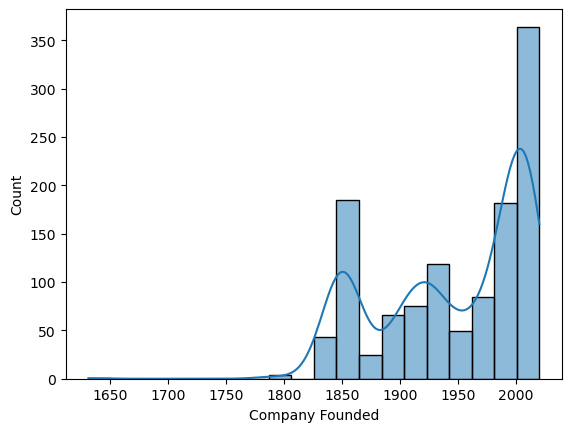

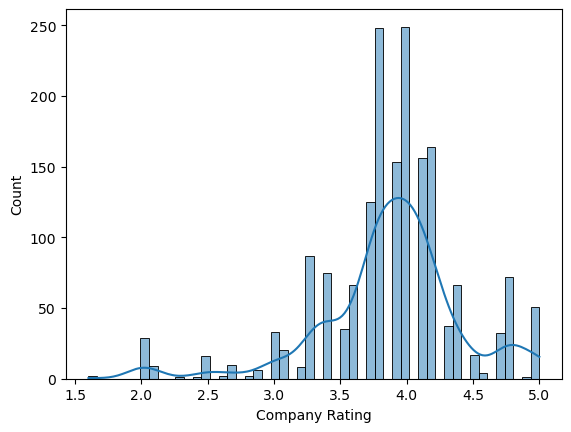

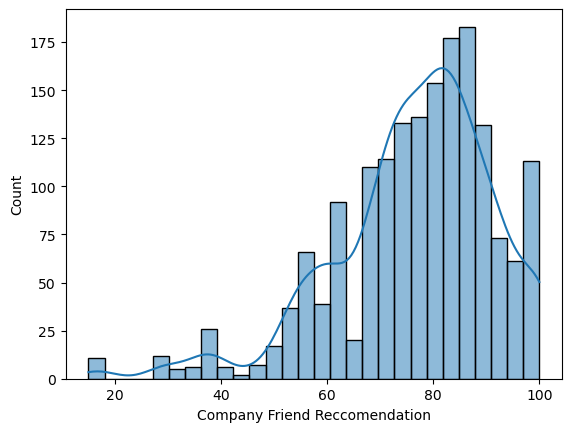

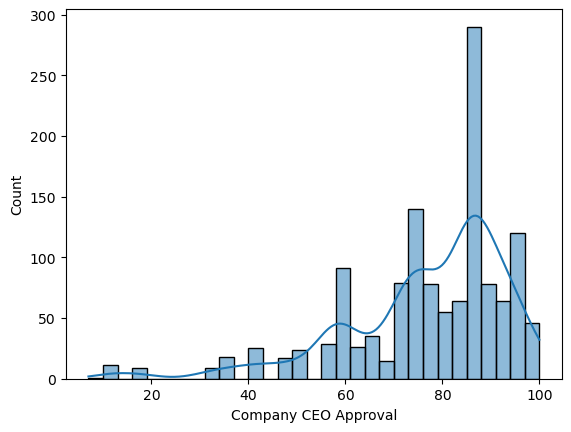

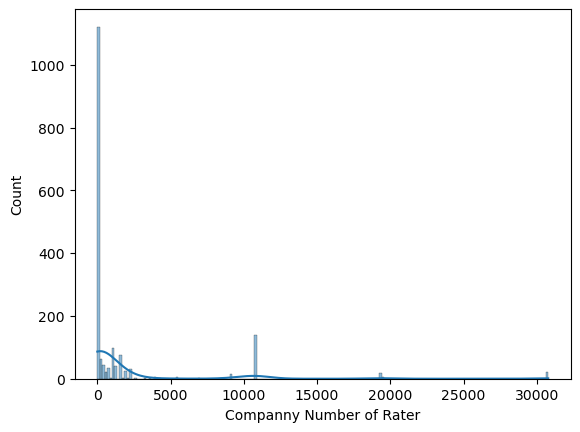

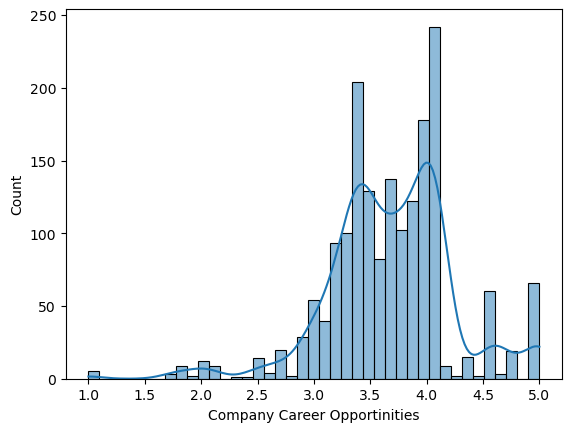

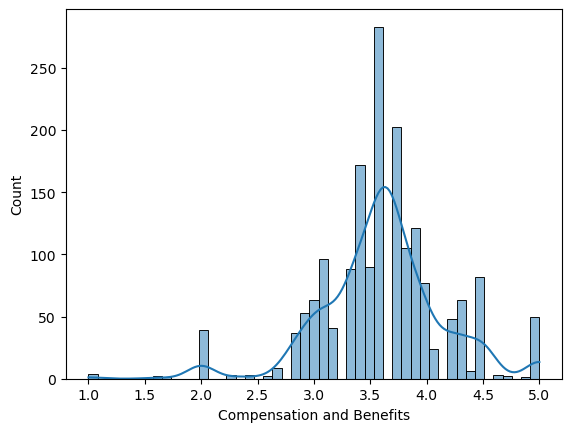

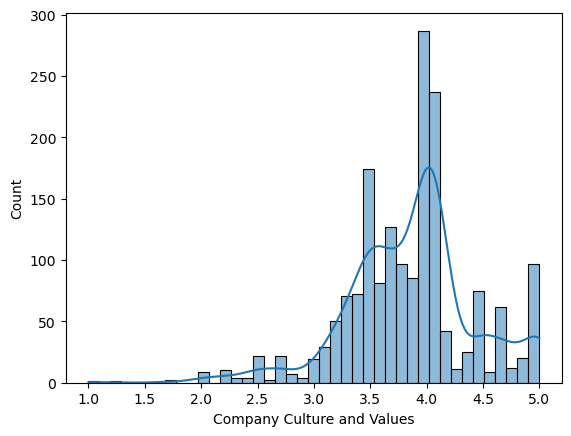

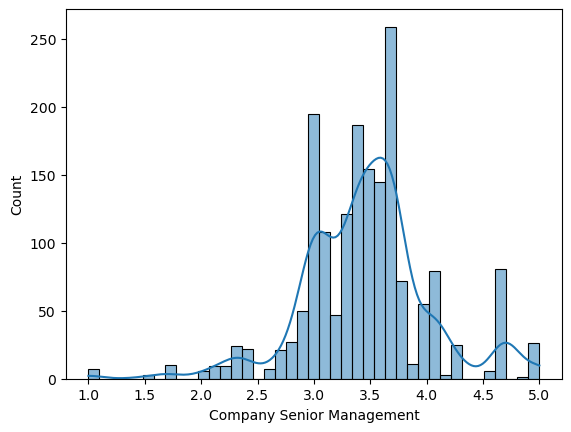

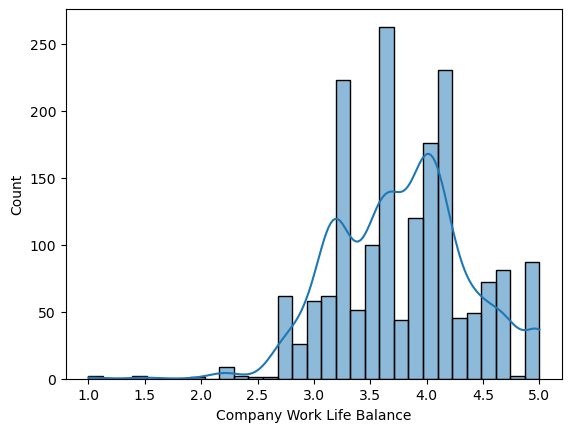

In [13]:
# Ignore the columns that have '_yn'
numeric_column_names = numeric_column_names.map(lambda x: x if '_yn' not in x else None ).dropna()

#Show a histplot of all the numeric columns
for column in numeric_column_names:
    ax = sns.histplot(data=df, x=column, kde=True)
    plt.show()

In [14]:
print(df['Estimate Base Salary'].dtype)
print(df['Estimate Base Salary'].head())

int64
0     95917
1     96555
2     96555
3     96555
4    115631
Name: Estimate Base Salary, dtype: int64


In [15]:
def categorical_x_numeric(df, numeric_column, categorical_column, number_of_rows):
    # Convert column to numeric (force errors to NaN)
    df[numeric_column] = pd.to_numeric(df[numeric_column], errors='coerce')

    df_grouped = df.groupby(by=categorical_column)[numeric_column].mean().sort_values(
        ascending=False).reset_index()

    ax = sns.barplot(data=df_grouped.head(number_of_rows),
                     y=categorical_column, x=numeric_column)
    
    plt.show()

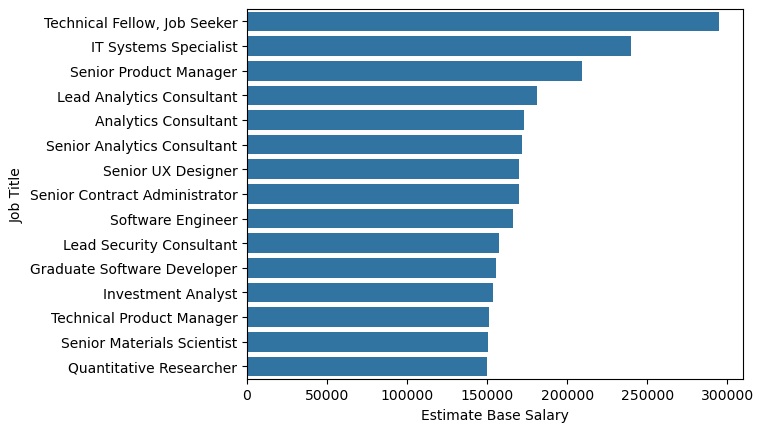

In [16]:
categorical_x_numeric(df, 'Estimate Base Salary', 'Job Title', 15)

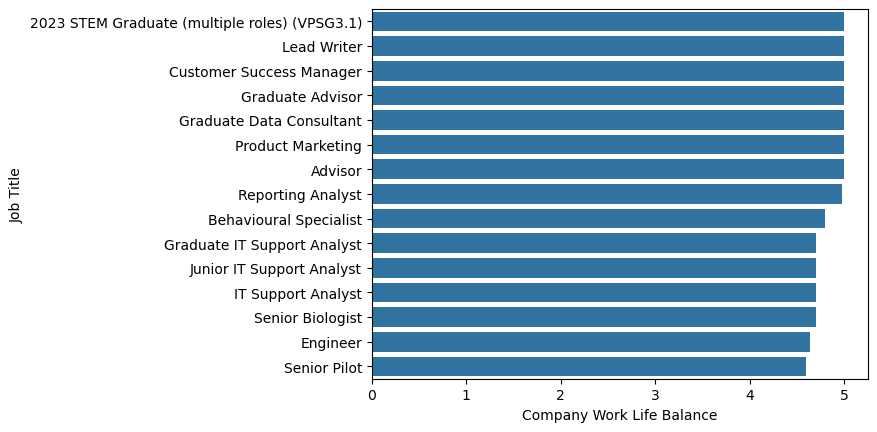

In [17]:
categorical_x_numeric(df, 'Company Work Life Balance', 'Job Title', 15)

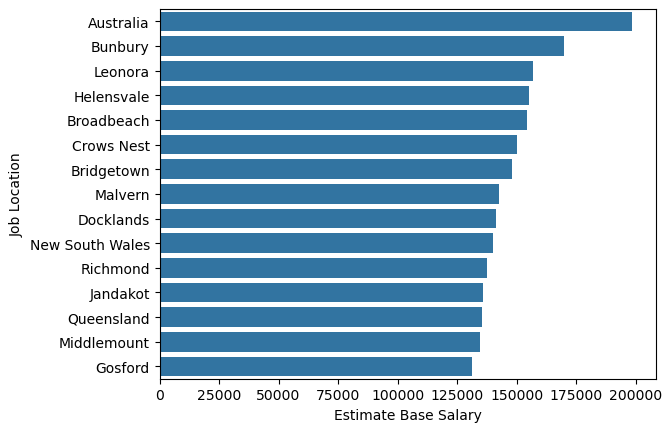

In [18]:
categorical_x_numeric(df, 'Estimate Base Salary', 'Job Location', 15)

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Final Insights</strong></h1>
</div>

1. Top Locations for Data Science Jobs Victoria (748 jobs) and New South Wales (695 jobs) lead in job availability. Together, these two states account      for over 69 % of all listings, making them prime locations for job seekers.

2. Most In-Demand Skills -Top technical skills required:
   SQL (772 mentions) Python (768 mentions) R (454 mentions) Mathematics (441 mentions) Statistics (353 mentions) Business intelligence tools like Excel    (263) and Tableau (220) are also frequently needed.

3. Salary Overview -
  Average base salary: AUD 102,876 Salary range: AUD 46,133 – 295,000 75% of jobs offer salaries below AUD 120,000, while the top 25% offer higher.

4. Job Titles & Descriptions -
  Common titles include: Data Scientist, Data Analyst, Machine Learning Engineer, and Postdoctoral Researcher. Job descriptions emphasize data cleaning,   predictive modeling, machine learning, collaboration, and communication skills.

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Recommendation for AirBnB</strong></h1>
</div>

1. For Job Seekers Focus your job search in Victoria and NSW for higher chances of landing a role. Upskill in SQL and Python, as they appear in nearly      all job listings. Gain working knowledge of Tableau, Excel, and cloud platforms (e.g., AWS) to stay competitive. Highlight soft skills like 
  communication, collaboration, and problem-solving in your resume.

2. For Recruiters & Employers
  Consider exploring Queensland and WA for emerging talent pools. To attract top candidates, clearly state salary ranges and promote flexible work         benefits. Ensure job descriptions align with key tech stacks—avoid redundancy and keep skill expectations reasonable.

3. For Training Institutes or Educators
  Offer short-term certification courses in: SQL & Python for data science Business intelligence tools (Tableau, Excel) Applied statistics & ML   
  algorithms Include modules on soft skills and real-world project experience.